# Setup

In [2]:
import time
import os
import pathlib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns

import cv2
from PIL import Image

import tensorflow as tf
from tensorflow import keras

#### ‚Äª‚Äª‚Äª GPU ÏÇ¨Ïö© Ïó¨Î∂Ä Íº≠ ÌôïÏù∏ÌïòÍ∏∞ ‚Äª‚Äª‚Äª

In [ ]:
assert len(tf.config.list_physical_devices('GPU'))<1, 'Please change runtime type'

# ÍµêÌÜµ ÌëúÏßÄÌåê Î∂ÑÎ•òÍ∏∞

## Ïã§Ïäµ ÏÑ§Î™Ö
* Ïã§Ïäµ Îç∞Ïù¥ÌÑ∞Îäî German Traffic Sign Benchmark (GTSRB) Îç∞Ïù¥ÌÑ∞ÏÖãÏúºÎ°ú 2011ÎÖÑ International Joint Conference on Neural Networks (IJCNN) 2011 Ïóê Í∞úÏµúÎêú ÎåÄÌöåÏùò Îç∞Ïù¥ÌÑ∞ÏÖãÏúºÎ°ú 39209 Í∞úÏùò Ïù¥ÎØ∏ÏßÄÍ∞Ä 43 Í∞úÏùò ÌÅ¥ÎûòÏä§Ïóê ÏÜçÌï®
* Ìè¥ÎçîÏóê Ï†ÄÏû•Îêú Ïù¥ÎØ∏ÏßÄÏôÄ ÌÅ¥ÎûòÏä§ ÎùºÎ≤®ÏùÑ ÏùΩÏñ¥ÏôÄ ÏßÅÏ†ë ÌïôÏäµ, Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ Íµ¨Ï∂ï
* ÏÇ¨Ï†Ñ ÌïôÏäµÎêú VGG16 Î™®Îç∏ÏùÑ ÌôúÏö©ÌïòÏó¨ ÍµêÌÜµ ÌëúÏßÄÌåêÏùÑ Î∂ÑÎ•òÌïòÎäî ÏûëÏóÖÏóê ÌôúÏö©

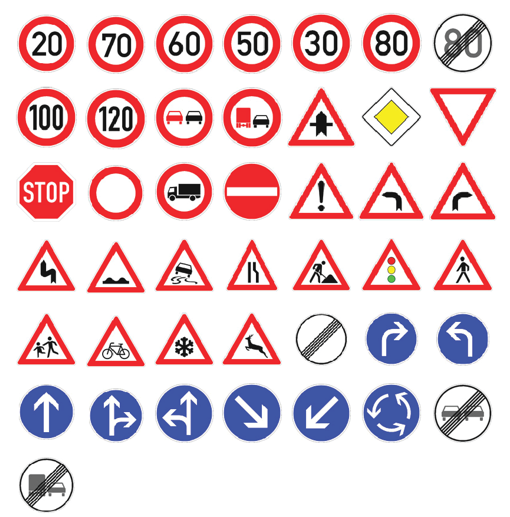

## 1. Îç∞Ïù¥ÌÑ∞ Î°úÎìúÏôÄ Ï†ÑÏ≤òÎ¶¨

In [4]:
 !wget gtsrb.zip https://www.dropbox.com/s/5uc83j3aky5b9cv/gtsrb.zip # web get

--2023-11-21 12:23:31--  http://gtsrb.zip/
Resolving gtsrb.zip (gtsrb.zip)... failed: Name or service not known.
wget: unable to resolve host address ‚Äògtsrb.zip‚Äô
--2023-11-21 12:23:31--  https://www.dropbox.com/s/5uc83j3aky5b9cv/gtsrb.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/5uc83j3aky5b9cv/gtsrb.zip [following]
--2023-11-21 12:23:31--  https://www.dropbox.com/s/raw/5uc83j3aky5b9cv/gtsrb.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucf8c57a2e2f38ddc6107cf236ac.dl.dropboxusercontent.com/cd/0/inline/CH92oa6SoWu03_nux-FLwbDGLRW-D4M7UymGgLL509QDAl-vlbp5XnnqjPO3FgLNfdSj5NbOqVNnOjwuv9WPurIDjj08oa3aL7MByPx3ndLPVYGPDpNizXgDbB4zkCuzfxxMwnPc1MPnmmGnIJ9_sC3l/file# [following]
--2023-11-21 12:23:32--  https://ucf8c57a2e2f

In [5]:
try:
     os.makedirs('/content/trafficSign')
except:
  pass

os.chdir('/content/trafficSign')
try:
    os.makedirs('gtsrb')
except:
    pass


In [6]:
!unzip -q /content/gtsrb.zip -d /content/trafficSign/gtsrb

replace /content/trafficSign/gtsrb/Meta.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

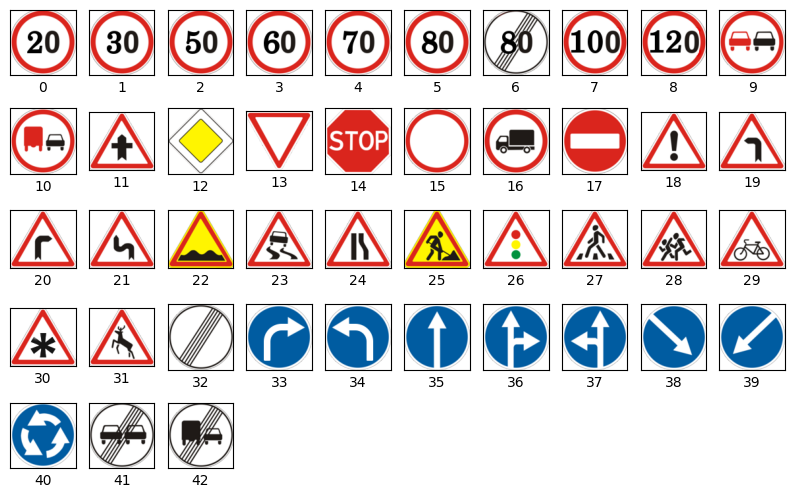

In [7]:
# Í∞Å ÌÅ¥ÎûòÏä§Î≥Ñ Ï†ïÎ≥¥ ÌôïÏù∏
dir = './gtsrb'

plt.figure(figsize=(10, 10))
for i in range (0,43):
    plt.subplot(8,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    path = dir + "/Meta/{0}.png".format(i)
    img = plt.imread(path)
    plt.imshow(img)
    plt.xlabel(i)

In [8]:
#dictionary to label all traffic signs class.
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)',
            2:'Speed limit (50km/h)',
            3:'Speed limit (60km/h)',
            4:'Speed limit (70km/h)',
            5:'Speed limit (80km/h)',
            6:'End of speed limit (80km/h)',
            7:'Speed limit (100km/h)',
            8:'Speed limit (120km/h)',
            9:'No passing',
            10:'No passing veh over 3.5 tons',
            11:'Right-of-way at intersection',
            12:'Priority road',
            13:'Yield',
            14:'Stop',
            15:'No vehicles',
            16:'Veh > 3.5 tons prohibited',
            17:'No entry',
            18:'General caution',
            19:'Dangerous curve left',
            20:'Dangerous curve right',
            21:'Double curve',
            22:'Bumpy road',
            23:'Slippery road',
            24:'Road narrows on the right',
            25:'Road work',
            26:'Traffic signals',
            27:'Pedestrians',
            28:'Children crossing',
            29:'Bicycles crossing',
            30:'Beware of ice/snow',
            31:'Wild animals crossing',
            32:'End speed + passing limits',
            33:'Turn right ahead',
            34:'Turn left ahead',
            35:'Ahead only',
            36:'Go straight or right',
            37:'Go straight or left',
            38:'Keep right',
            39:'Keep left',
            40:'Roundabout mandatory',
            41:'End of no passing',
            42:'End no passing veh > 3.5 tons' }

**TODOS: Îç∞Ïù¥ÌÑ∞ Î°úÎìú**
1.  Í∞Å ÌÅ¥ÎûòÏä§Î≥Ñ Ìè¥ÎçîÏóê Îì§Ïñ¥Í∞Ä image ÌååÏùº ÎÑ§ÏûÑ Î¶¨Ïä§Ìä∏Ïù∏ **`images`** ÏÉùÏÑ±
2.  images Î•º for Î¨∏ÏùÑ ÎèåÎ©¥ÏÑú Í∞Å Ïù¥ÎØ∏ÏßÄÏùò ÌÅ¨Í∏∞Î•º Ï°∞Ï†ïÌïú ÌõÑÏóê **`image_data`** Î¶¨Ïä§Ìä∏Ïóê Ï≤®Î∂ÄÌïòÍ≥† ÌÅ¥ÎûòÏä§ ÎùºÎ≤®ÏùÄ **`image_labels`** Ïóê Ï≤®Î∂Ä
3. **`image_data`** ÏôÄ **`image_labels`** Î•º numpy arrayÎ°ú Î≥ÄÌôò



In [9]:
!pwd # ÌòÑÏû¨Í≤ΩÎ°ú

/content/trafficSign


In [10]:
NUM_CLASSES = 43
H = 64
W = 64

image_data = []
image_labels = []

# Ïã§Ïäµ ÏΩîÎìú ÏûëÏÑ± ü°ìü°ì
for i in range(NUM_CLASSES):
    path = './gtsrb/Train/' + str(i)
    print(path)
    images = os.listdir(path)

    for img in images:
        try:
            image = cv2.imread(path + '/' +img)
            image_fromarray = Image.fromarray(image, 'RGB')
            resized_image = image_fromarray.resize((H, W))
            image_data.append(np.array(resized_image))
            image_labels.append(i)
        except:
            print("Error - Image loading")

# Î¶¨Ïä§Ìä∏Î•º numpy arrayÎ°ú Î≥ÄÌôò
image_data = np.array(image_data)
image_labels = np.array(image_labels)

./gtsrb/Train/0
./gtsrb/Train/1
./gtsrb/Train/2
./gtsrb/Train/3
./gtsrb/Train/4
./gtsrb/Train/5
./gtsrb/Train/6
./gtsrb/Train/7
./gtsrb/Train/8
./gtsrb/Train/9
./gtsrb/Train/10
./gtsrb/Train/11
./gtsrb/Train/12
./gtsrb/Train/13
./gtsrb/Train/14
./gtsrb/Train/15
./gtsrb/Train/16
./gtsrb/Train/17
./gtsrb/Train/18
./gtsrb/Train/19
./gtsrb/Train/20
./gtsrb/Train/21
./gtsrb/Train/22
./gtsrb/Train/23
./gtsrb/Train/24
./gtsrb/Train/25
./gtsrb/Train/26
./gtsrb/Train/27
./gtsrb/Train/28
./gtsrb/Train/29
./gtsrb/Train/30
./gtsrb/Train/31
./gtsrb/Train/32
./gtsrb/Train/33
./gtsrb/Train/34
./gtsrb/Train/35
./gtsrb/Train/36
./gtsrb/Train/37
./gtsrb/Train/38
./gtsrb/Train/39
./gtsrb/Train/40
./gtsrb/Train/41
./gtsrb/Train/42


In [11]:
image_data.shape

(39209, 64, 64, 3)

**TODOS: ÌïôÏäµ, Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ÏÖã ÏÉùÏÑ±**
1.  [**`np.random.shuffle`**](https://numpy.org/doc/stable/reference/random/generated/numpy.random.shuffle.html) ÏùÑ ÌôúÏö©ÌïòÏó¨ Ïù¥ÎØ∏ÏßÄÏùò Ïù∏Îç±Ïä§Î•º Í≥®Í≥†Î£® ÏÑûÏñ¥Ï§å
2. [**`train_test_split`**](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) Ìï®ÏàòÎ•º ÌôúÏö©ÌïòÏó¨ ÌïôÏäµ/Í≤ÄÏ¶ù/ÏãúÌóò Îç∞Ïù¥ÌÑ∞, ÌïôÏäµ/Í≤ÄÏ¶ù/ÏãúÌóòÌóò ÎùºÎ≤® Î∂ÑÎ¶¨, Í∞ÅÍ∞Å **`X_train`**/**`X_valid`**/**`X_test`**, **`y_train`**/**`y_valid`**/**`y_test`**

3.  **`X_train`**, **`X_valid`** Î•º 255Î°ú ÎÇòÎàÑÏñ¥ 0~1 Î≤îÏúÑÎ°ú Î≥ÄÌôò


In [12]:
from sklearn.model_selection import train_test_split

# Ïã§Ïäµ ÏΩîÎìú ÏûëÏÑ± ü°ìü°ì
# Îç∞Ïù¥ÌÑ∞ÏÖã ÏÖîÌîå
shuffle_indexes = np.arange(image_data.shape[0])
np.random.shuffle(shuffle_indexes)
image_data = image_data[shuffle_indexes]
image_labels = image_labels[shuffle_indexes]

# ÌïôÏäµ/Í≤ÄÏ¶ù/ÏãúÌóò Îç∞Ïù¥ÌÑ∞ Î∂ÑÎ¶¨
X_train, X_test, y_train, y_test = train_test_split(image_data, image_labels, test_size=0.2)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.25)

# Ï†ïÍ∑úÌôî
X_train = X_train/255.0
X_valid = X_valid/255.0
X_test = X_test/255.0

In [13]:
print("X_train.shape", X_train.shape, "\t X_valid.shape", X_valid.shape, "\t X_test.shape", X_test.shape)
print("y_train.shape", y_train.shape, "\t\t\t y_valid.shape", y_valid.shape, "\t\t\t y_test.shape", y_test.shape)

X_train.shape (23525, 64, 64, 3) 	 X_valid.shape (7842, 64, 64, 3) 	 X_test.shape (7842, 64, 64, 3)
y_train.shape (23525,) 			 y_valid.shape (7842,) 			 y_test.shape (7842,)


## 2. VGG16 Í∏∞Î∞ò Î™®Îç∏ ÏÉùÏÑ± Î∞è ÌïôÏäµ

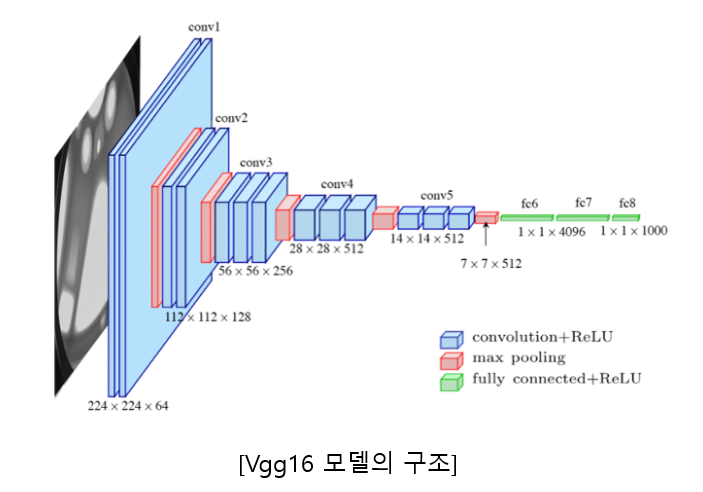

**TODOS: VGG16 Í∏∞Î∞ò Î™®Îç∏ ÏÉùÏÑ± Î∞è ÌïôÏäµ**
1.  [**`VGG16`**](https://www.tensorflow.org/api_docs/python/tf/keras/applications/VGG16?hl=hi) apiÎ•º ÌôúÏö©ÌïòÏó¨ **`input_shape=(64,64,3)`**, **`weight='imagenet'`**, **`include_top=False`** Ï°∞Í±¥ÏùÑ ÌôúÏö©ÌïòÏó¨ Í∏∞Î∞ò Î™®Îç∏ Î∂àÎü¨Ïò§Í∏∞
2. vgg16 Í∏∞Î∞ò Î™®Îç∏Ïùò Í∞Å Ï∏µÏùÑ **`vgg16.layers`** Î°ú Î∂àÎü¨ÏôÄ Í∞Å Ï∏µÏùò **`trainable`** ÏÉÅÌÉúÎ•º **`False`** Î°ú Î≥ÄÌôò

3.  Í∏∞Î∞ò Î™®Îç∏Ïóê Flatten Î†àÏù¥Ïñ¥ÏôÄ Dense Î†àÏù¥Ïñ¥ Ï∂îÍ∞Ä
4.  optimizerÏôÄ lossÎ•º ÏßÄÏ†ïÌï¥Ï£ºÎ©∞  model Ïª¥ÌååÏùº
5.  20 epoch ÎèôÏïà ÌïôÏäµ ÏßÑÌñâ



Model

Î∂ÑÎ•òÍ∏∞ TOP

VGG without TOP

Ïù¥ÎØ∏ÏßÄ

In [14]:
# Ïã§Ïäµ ÏΩîÎìú ÏûëÏÑ± ü°ìü°ì

# vgg16 Î™®Îç∏ Î∂àÎü¨Ïò§Í∏∞
from tensorflow.keras.applications.vgg16 import VGG16

vgg16 = VGG16(input_shape=(64,64,3), weights='imagenet', include_top=False)

In [15]:
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

In [16]:
vgg16.layers

In [17]:
# Ïã§Ïäµ ÏΩîÎìú ÏûëÏÑ± ü°ìü°ì

# Ïù¥ÎØ∏ ÌïôÏäµÎêú Ï∏µÏùÑ ÎçîÏù¥ÏÉÅ ÌïôÏäµÌïòÏßÄ ÏïäÏùå
# freeze!

for layer in vgg16.layers:
  layer.trainable = False

In [18]:
# Ïã§Ïäµ ÏΩîÎìú ÏûëÏÑ± ü°ìü°ì

from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Input, Dropout, BatchNormalization

add_model = Sequential()
add_model.add(Flatten(input_shape = vgg16.output_shape[1:]))
add_model.add(Dense(1024, activation = 'relu'))
add_model.add(Dense(NUM_CLASSES, activation = 'softmax'))

model = Model(inputs = vgg16.inputs, outputs = add_model(vgg16.outputs))

# optimizer, loss, metricÏùÑ ÌôúÏö©ÌïòÏó¨ compile
model.compile(
  loss='sparse_categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

In [19]:
epochs = 20
history = model.fit(X_train, y_train, batch_size=128, epochs=epochs,
    validation_data=(X_valid, y_valid))

Epoch 1/20
184/184 [==============================] - 26s 84ms/step - loss: 1.3792 - accuracy: 0.5927 - val_loss: 0.9044 - val_accuracy: 0.7267
Epoch 2/20
184/184 [==============================] - 10s 56ms/step - loss: 0.6817 - accuracy: 0.7924 - val_loss: 0.6039 - val_accuracy: 0.8179
Epoch 3/20
184/184 [==============================] - 10s 56ms/step - loss: 0.4594 - accuracy: 0.8645 - val_loss: 0.5007 - val_accuracy: 0.8424
Epoch 4/20
184/184 [==============================] - 10s 57ms/step - loss: 0.3316 - accuracy: 0.9054 - val_loss: 0.3722 - val_accuracy: 0.8926
Epoch 5/20
184/184 [==============================] - 10s 57ms/step - loss: 0.2650 - accuracy: 0.9231 - val_loss: 0.3380 - val_accuracy: 0.8963
Epoch 6/20
184/184 [==============================] - 10s 57ms/step - loss: 0.2027 - accuracy: 0.9443 - val_loss: 0.2969 - val_accuracy: 0.9083
Epoch 7/20
184/184 [==============================] - 11s 58ms/step - loss: 0.1810 - accuracy: 0.9472 - val_loss: 0.2891 - val_accuracy:

## 3. ÌïôÏäµ Í≤∞Í≥º ÏãúÍ∞ÅÌôî

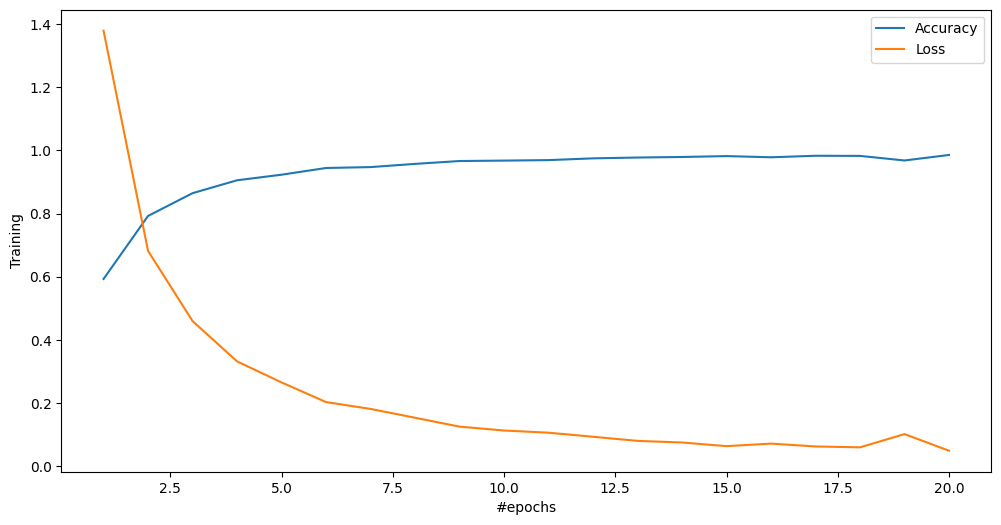

In [20]:
q = len(list(history.history['loss']))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 1+q), history.history['accuracy'], label = 'Accuracy')
plt.plot(range(1, 1+q), history.history['loss'], label = 'Loss')
plt.xlabel('#epochs')
plt.ylabel('Training')
plt.legend();

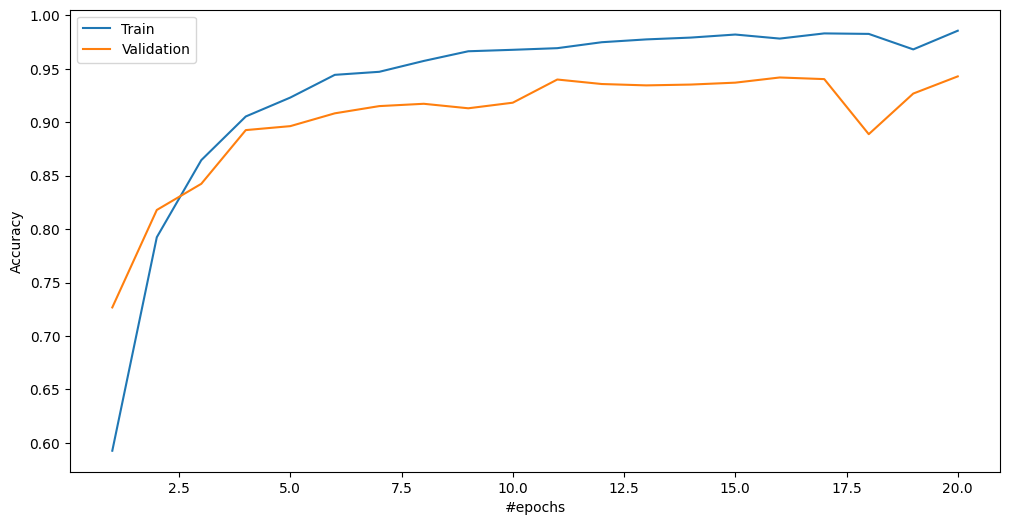

In [21]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 1+q), history.history['accuracy'], label = 'Train')
plt.plot(range(1, 1+q), history.history['val_accuracy'], label = 'Validation')
plt.xlabel('#epochs')
plt.ylabel('Accuracy')
plt.legend();

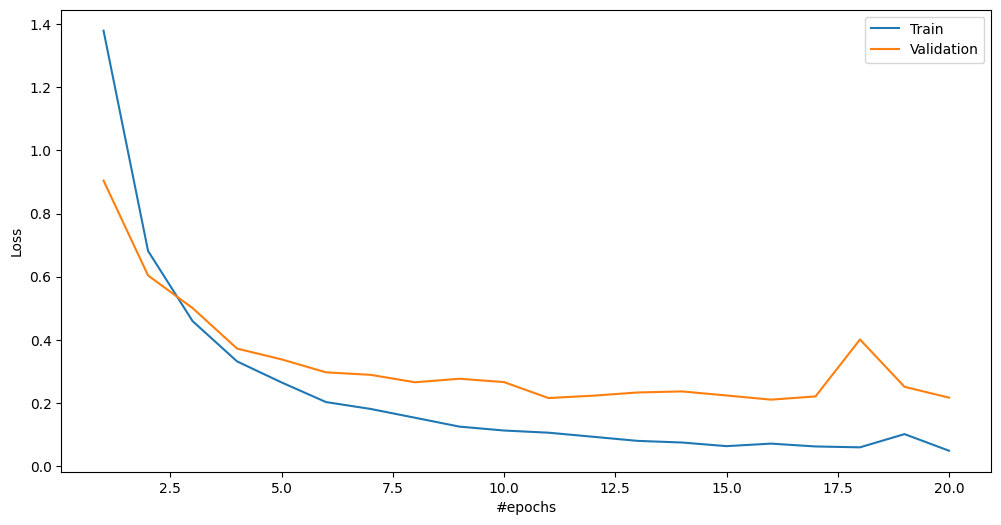

In [22]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 1+q), history.history['loss'], label = 'Train')
plt.plot(range(1, 1+q), history.history['val_loss'], label = 'Validation')
plt.xlabel('#epochs')
plt.ylabel('Loss')
plt.legend();

In [23]:
model.evaluate(X_test, y_test)

246/246 [==============================] - 5s 16ms/step - loss: 0.2024 - accuracy: 0.9443


[0.20239225029945374, 0.9442744255065918]